# BT2103 Project

## Introduction: 
The data set contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. Each data sample is described by 23 feature attributes (columns B to X). The target feature (column Y) to be predicted is binary valued 0 (= not default) or 1 (= default).

We aim to predict whether a credit card holder is able to make payment in the next month (1 = yes , 0 = no)

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)




## Importing Relevant Libaries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2, SelectKBest, f_classif, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD
from imblearn.over_sampling import SMOTE

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('card.csv',header=[1])

In [3]:
# Get a glimpse of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Let's see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
## Statistics of data
## Here we can check if there are values that are potentially out of range in the variable.
## such as education - supposed to only have values from 1 to 4, but in this case there were occurrences 
## out of the range.
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From the statistics above, there is no missing data/null data in our dataset but there are several anomalies that we have to deal with later on.
- EDUCATION has categories 0, 5 and 6 that are not part of the labels.
- MARRIAGE has a category 0 that is not part of the labels.

In [6]:
# Create another column with a clearer header for defaulters
df['Defaulter'] = df['default payment next month']
df.drop('default payment next month', axis = 1, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
## DROP ID COLUMN as there are independent and identically distributed variables that are not correlated to `default payment next month` variable

df = df.drop("ID", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
X_naive = df.drop("Defaulter" , axis =1 )
y_naive = df['Defaulter']

X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_naive, y_naive, test_size=0.25, random_state=1234)

### Analysis on Age of Credit Card Holders

In [9]:
df['AGE'].describe() ## all credit card holders are above the age of 21, and below the age of 79

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Age distribution')

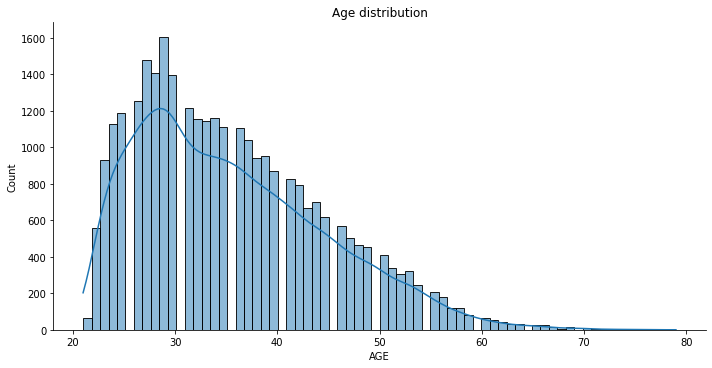

In [10]:
## Distribution plot of AGE
sns.displot(x='AGE', data = df, kde=True, aspect=2)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

### Analysis on Marital Status of Credit Card Holders

In [11]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

<AxesSubplot: >

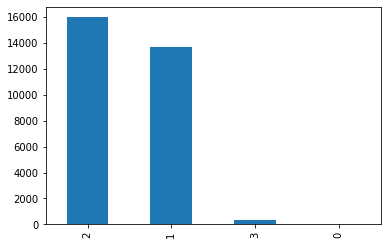

In [12]:
df.MARRIAGE.value_counts().plot(kind = 'bar') ## have 0 values

In [13]:
# The value 0 does not represent any category of marriage. 
# Hence, I am going to map 0 to 3, to categorise it under others.
df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

<Figure size 720x360 with 0 Axes>

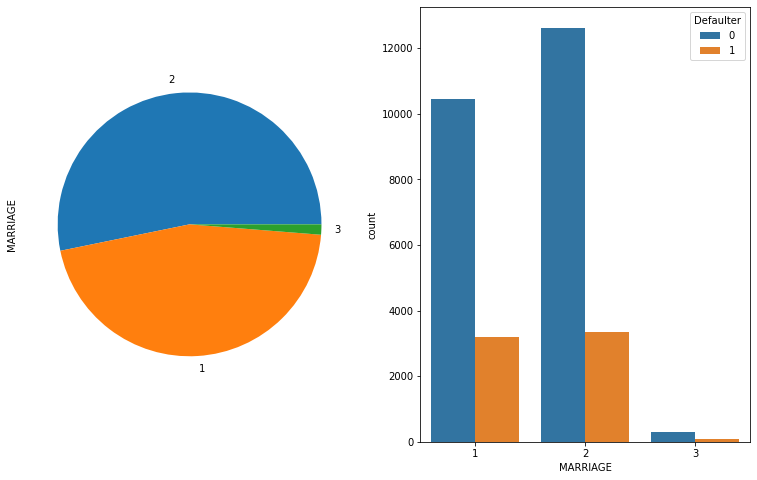

In [14]:
# Plotting pie chart and bar chart to see how the marital status of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'MARRIAGE', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that the highest proportion of defaulters are Single, followed by Married then Others.

### Analysis on Education of Credit Card Holders

<AxesSubplot: >

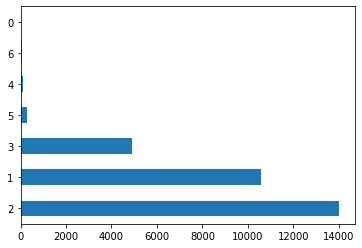

In [15]:
df.EDUCATION.value_counts().plot(kind = "barh")

In [16]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown" 
# Changing 0,5 and 6 to keep it under 1 category.

## why don't we change it to others?

df['EDUCATION'].replace({0:4,1:1,2:2,3:3,4:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

<Figure size 720x360 with 0 Axes>

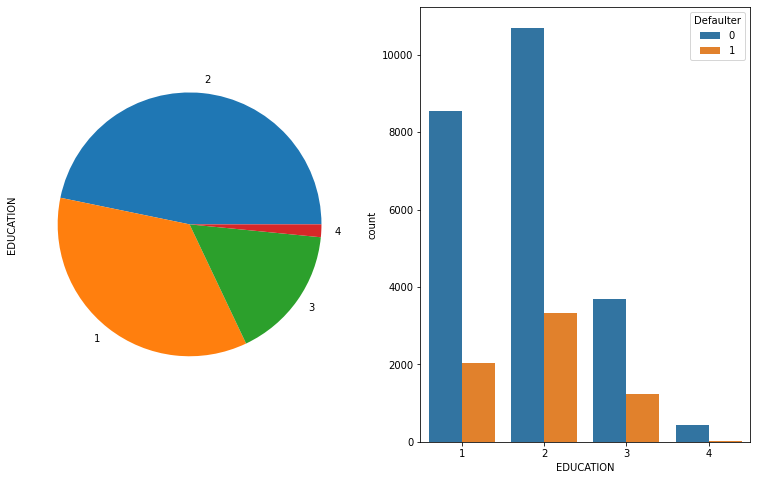

In [17]:
# Plotting pie chart and bar chart to see how the the education of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'EDUCATION', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that the largest proportion of Defaulters had university education.

### Analysis on Gender of Credit Card Holders

<AxesSubplot: >

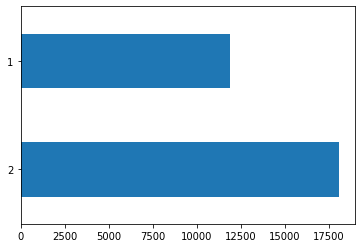

In [18]:
df.SEX.value_counts().plot(kind = "barh")

<AxesSubplot: xlabel='SEX', ylabel='count'>

<Figure size 720x360 with 0 Axes>

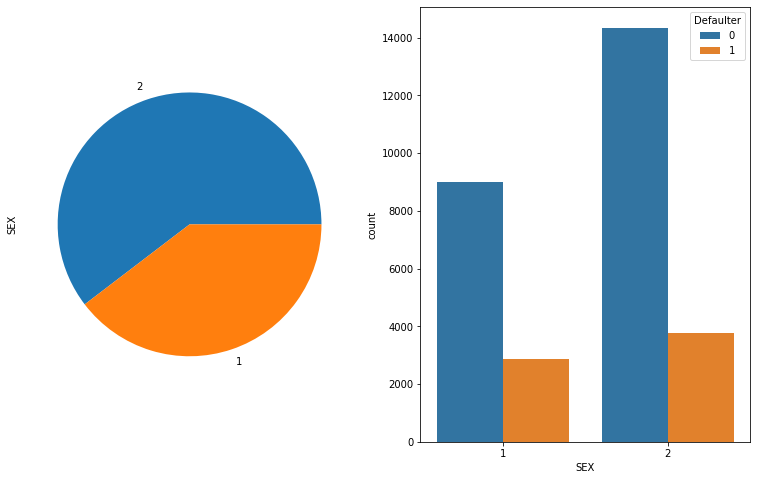

In [19]:
# Plotting pie chart and bar chart to see how the the education of an individual is correlated to whether the individual defaults
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'SEX', hue = 'Defaulter', data = df)

From the pie chart and bar graph above, we can see that the number of defaulters has a higher proportion of females.

### Analysis on Amount of Given Credit of Credit Card Holders


In [20]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Text(0.5, 1.0, 'Credit Distribution')

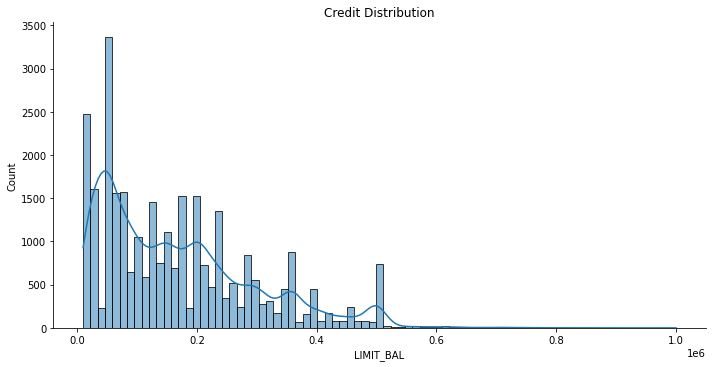

In [21]:
## Distribution plot of LIMIT_BAL
sns.displot(x='LIMIT_BAL', data = df, kde=True, aspect=2)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Credit Distribution")

<AxesSubplot: xlabel='Defaulter', ylabel='count'>

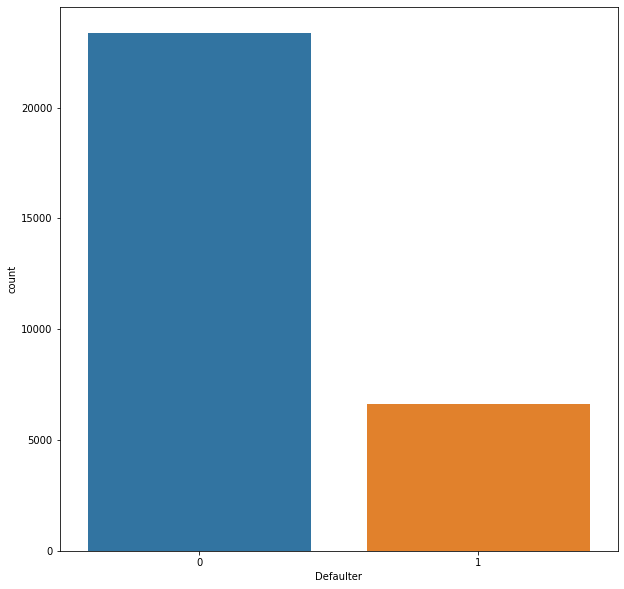

In [22]:
## Count plot 
plt.figure(figsize=(10,10))

sns.countplot(x="Defaulter", data = df)

From our box plot above, we can see that generally, defaulters have lower mean credit balances than non-defaulters. (which makes sense because the higher the "chance" of you defaulting, the lower your credit balance -> is a cycle)

### Analysis for PAY_0 to PAY_6 (no PAY_1)


C:\Users\user\AppData\Local\Temp\ipykernel_24628\816616122.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


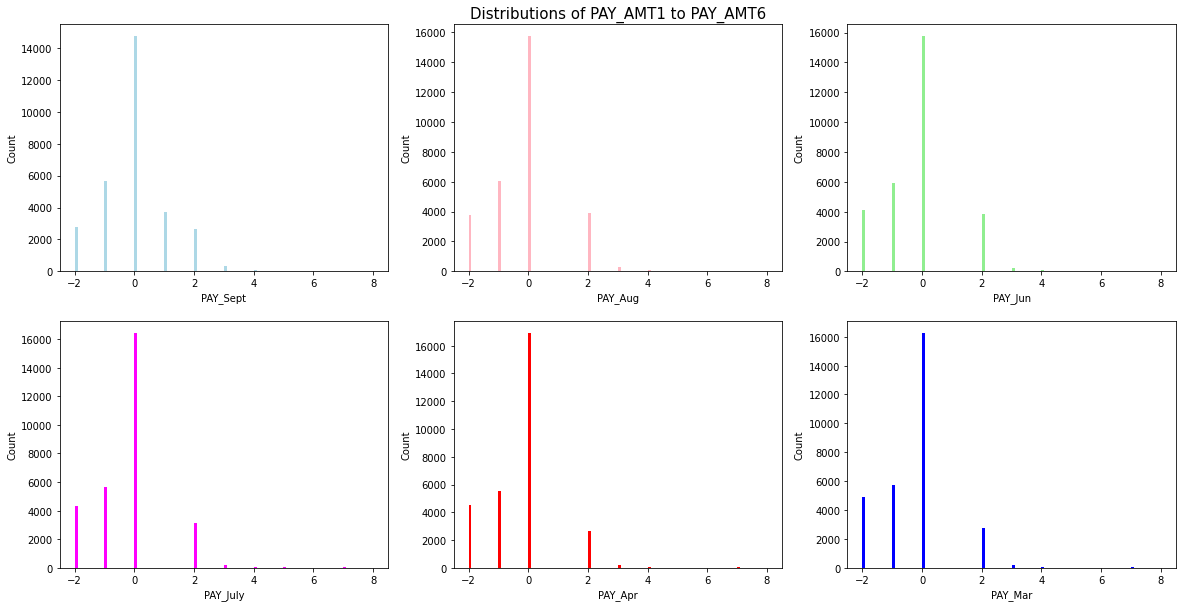

In [23]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.hist(df.PAY_0, bins = 100, color = "lightblue")
plt.xlabel('PAY_Sept')
plt.ylabel('Count')

plt.subplot(232)
plt.hist(df.PAY_2, bins = 100, color = "lightpink")
plt.xlabel('PAY_Aug')
plt.ylabel('Count')
plt.title('Distributions of PAY_AMT1 to PAY_AMT6', fontsize=15)

plt.subplot(233)
plt.hist(df.PAY_3, bins = 100, color = "lightgreen")
plt.xlabel('PAY_Jun')
plt.ylabel('Count')

plt.subplot(234)
plt.hist(df.PAY_4, bins = 100, color = "magenta")
plt.xlabel('PAY_July')
plt.ylabel('Count')

plt.subplot(235)
plt.hist(df.PAY_5, bins = 100, color = "red")
plt.xlabel('PAY_Apr')
plt.ylabel('Count')

plt.subplot(236)
plt.hist(df.PAY_6, bins = 100, color = "blue")
plt.xlabel('PAY_Mar')
plt.ylabel('Count')
plt.show()

In [24]:
# change -1 and -2 to 0, and positive numbers to 1. 
# 0 meaning that the customer paid on time, 1 meaning that the customer paid late.
df["PAY_0"].loc[df['PAY_0'] < 0] = 0
df["PAY_2"].loc[df['PAY_2'] < 0] = 0
df["PAY_3"].loc[df['PAY_3'] < 0] = 0
df["PAY_4"].loc[df['PAY_4'] < 0] = 0
df["PAY_5"].loc[df['PAY_5'] < 0] = 0
df["PAY_6"].loc[df['PAY_6'] < 0] = 0

df["PAY_0"].loc[df['PAY_0'] > 1] = 1
df["PAY_2"].loc[df['PAY_2'] > 1] = 1
df["PAY_3"].loc[df['PAY_3'] > 1] = 1
df["PAY_4"].loc[df['PAY_4'] > 1] = 1
df["PAY_5"].loc[df['PAY_5'] > 1] = 1
df["PAY_6"].loc[df['PAY_6'] > 1] = 1


### Analysis for BILL_AMT1 to BILL_AMT6

In [25]:
df['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_24628\953784070.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


Text(0, 0.5, 'Count')

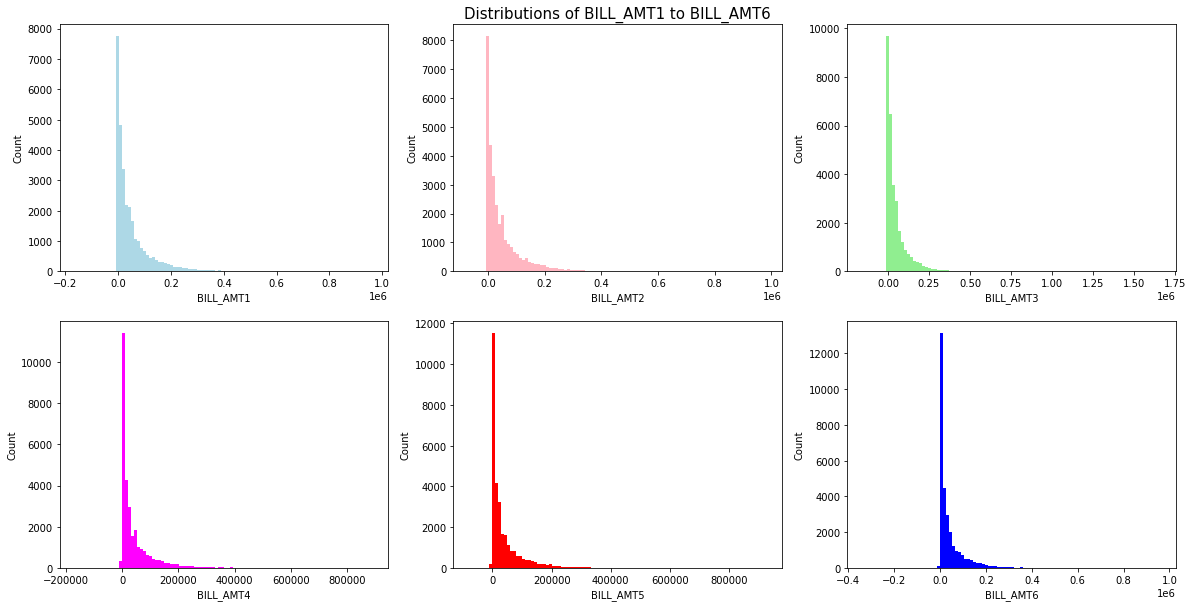

In [26]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.hist(df.BILL_AMT1, bins = 100, color = "lightblue")
plt.xlabel('BILL_AMT1')
plt.ylabel('Count')

plt.subplot(232)
plt.hist(df.BILL_AMT2, bins = 100, color = "lightpink")
plt.xlabel('BILL_AMT2')
plt.ylabel('Count')
plt.title('Distributions of BILL_AMT1 to BILL_AMT6', fontsize=15)

plt.subplot(233)
plt.hist(df.BILL_AMT3, bins = 100, color = "lightgreen")
plt.xlabel('BILL_AMT3')
plt.ylabel('Count')

plt.subplot(234)
plt.hist(df.BILL_AMT4, bins = 100, color = "magenta")
plt.xlabel('BILL_AMT4')
plt.ylabel('Count')

plt.subplot(235)
plt.hist(df.BILL_AMT5, bins = 100, color = "red")
plt.xlabel('BILL_AMT5')
plt.ylabel('Count')

plt.subplot(236)
plt.hist(df.BILL_AMT6, bins = 100, color = "blue")
plt.xlabel('BILL_AMT6')
plt.ylabel('Count')

### Analysis for PAY_AMT1 to PAY_AMT6

C:\Users\user\AppData\Local\Temp\ipykernel_24628\3073398379.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


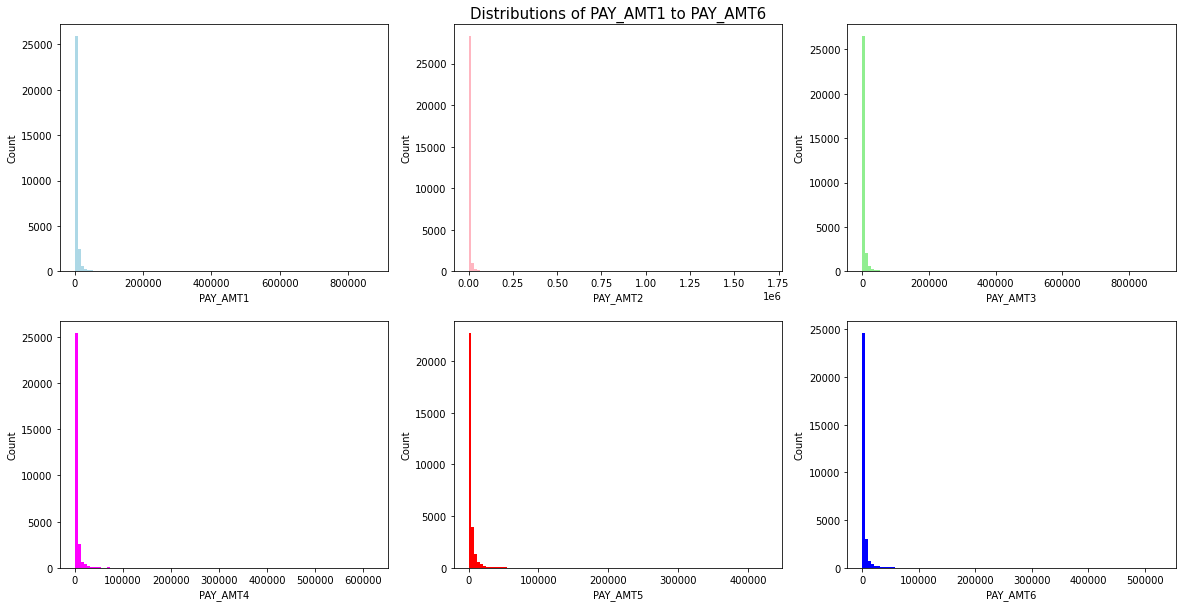

In [27]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.hist(df.PAY_AMT1, bins = 100, color = "lightblue")
plt.xlabel('PAY_AMT1')
plt.ylabel('Count')

plt.subplot(232)
plt.hist(df.PAY_AMT2, bins = 100, color = "lightpink")
plt.xlabel('PAY_AMT2')
plt.ylabel('Count')
plt.title('Distributions of PAY_AMT1 to PAY_AMT6', fontsize=15)

plt.subplot(233)
plt.hist(df.PAY_AMT3, bins = 100, color = "lightgreen")
plt.xlabel('PAY_AMT3')
plt.ylabel('Count')

plt.subplot(234)
plt.hist(df.PAY_AMT4, bins = 100, color = "magenta")
plt.xlabel('PAY_AMT4')
plt.ylabel('Count')

plt.subplot(235)
plt.hist(df.PAY_AMT5, bins = 100, color = "red")
plt.xlabel('PAY_AMT5')
plt.ylabel('Count')

plt.subplot(236)
plt.hist(df.PAY_AMT6, bins = 100, color = "blue")
plt.xlabel('PAY_AMT6')
plt.ylabel('Count')
plt.show()

### Hypothesis Testing for all Attributes

We are carrying out a two-tailed test on each attribute to determine if that attribute is statistically significant in determining the outcome of default payment next month.

H0: The attribute is not statistically significant in predicting the outcome of default payment next month

H1: The attribute is statistically significant in predicitng the outcome of deault payment next month

In [28]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
statsdf = pd.DataFrame()
for var in numeric:
    statsvalue = stats.ttest_ind(df.loc[df['Defaulter'] == 1, var], df.loc[df['Defaulter'] == 0, var])
    temp = pd.DataFrame([var, statsvalue[0], statsvalue[1]]).T
    temp.columns = ['Attribute', 'T-Value', 'P-Value']
    statsdf = pd.concat([statsdf, temp], axis = 0, ignore_index = True)

statsdf = statsdf.sort_values(by = 'P-Value').reset_index(drop = True)
statsdf

C:\Users\user\AppData\Local\Temp\ipykernel_24628\606660175.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statsvalue = stats.ttest_ind(df.loc[df['Defaulter'] == 1, var], df.loc[df['Defaulter'] == 0, var])


,Attribute,T-Value,P-Value
0,Defaulter,inf,0.0
1,PAY_6,43.974774,0.0
2,PAY_5,47.978341,0.0
3,PAY_4,49.63628,0.0
4,PAY_3,53.19237,0.0
5,PAY_0,68.572828,0.0
6,PAY_2,62.206846,0.0
7,LIMIT_BAL,-26.908522,0.0
8,PAY_AMT1,-12.665063,0.0
9,PAY_AMT2,-10.163244,0.0


At a 5% level of significance, we reject the null hypothesis for attributes with P-Value less than 0.05 and conclude that the attribute is statistically significant in predicting the outcome of default payment next month.

## Data Pre-Processing

### One Hot Encoding

In [29]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [30]:
## Get dummy variables for Education and Marriage (since they have more than 2 categories)
df = pd.get_dummies(df, columns=["EDUCATION", "MARRIAGE"])
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,Defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,1,1,0,0,0,0,3913,...,0,0,1,0,1,0,0,1,0,0
1,120000,2,26,0,1,0,0,0,1,2682,...,0,2000,1,0,1,0,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,1,0,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,1,0,0,1,0,0
4,50000,1,57,0,0,0,0,0,0,8617,...,689,679,0,0,1,0,0,1,0,0


In [31]:
## Rename the columns to show the categories they represent
df = df.rename(columns = {
    'EDUCATION_1' : 'EDUCATION_GradSch',
    'EDUCATION_2' : 'EDUCATION_University',
    'EDUCATION_3' : 'EDUCATION_HighSch',
    'EDUCATION_4' : 'EDUCATION_Others',
    'MARRIAGE_1' : 'MARRIAGE_Married',
    'MARRIAGE_2' : 'MARRIAGE_Single',
    'MARRIAGE_3' : 'MARRIAGE_Others', 
    'PAY_0' : 'PAY_Sept', 
    'PAY_2' : 'PAY_Aug', 
    'PAY_3' : 'PAY_Jul', 
    'PAY_4' : 'PAY_June', 
    'PAY_5' : 'PAY_May', 
    'PAY_6' : 'PAY_Apr'
})

In [32]:
## Drop one of the variables for Education and Marriage
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis = 1, inplace = True)

In [33]:
## Change the encoding for sex to 0 and 1
## Male = 0 Female = 1
df = df.replace({
    "SEX": {2 : 1, 1 : 0}
})
df.head()

,LIMIT_BAL,SEX,AGE,PAY_Sept,PAY_Aug,PAY_Jul,PAY_June,PAY_May,PAY_Apr,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter,EDUCATION_GradSch,EDUCATION_University,EDUCATION_HighSch,MARRIAGE_Married,MARRIAGE_Single
0,20000,1,24,1,1,0,0,0,0,3913,...,0,0,0,0,1,0,1,0,1,0
1,120000,1,26,0,1,0,0,0,1,2682,...,1000,1000,0,2000,1,0,1,0,0,1
2,90000,1,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,1,0
4,50000,0,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,0


### Scaling

In [34]:
## Here we scale the data using the MinMaxScaler from the sklearn package
scaler = MinMaxScaler(feature_range = (0,1))

In [35]:

## Scaling the X_train data
scaled_data = scaler.fit_transform(df)
scaled_data= pd.DataFrame(scaled_data,columns=df.columns)
scaled_data.head()

X = scaled_data.drop("Defaulter",axis=1 )
y = scaled_data['Defaulter']

# standardising df
df_standardised = (df - df.min())/(df.max() - df.min())
df_standardised

,LIMIT_BAL,SEX,AGE,PAY_Sept,PAY_Aug,PAY_Jul,PAY_June,PAY_May,PAY_Apr,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter,EDUCATION_GradSch,EDUCATION_University,EDUCATION_HighSch,MARRIAGE_Married,MARRIAGE_Single
0,0.010101,1.0,0.051724,1.0,1.0,0.0,0.0,0.0,0.0,0.149982,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0
1,0.111111,1.0,0.086207,0.0,1.0,0.0,0.0,0.0,1.0,0.148892,...,0.001116,0.001610,0.000000,0.003783,1.0,0.0,1.0,0.0,0.0,1.0
2,0.080808,1.0,0.224138,0.0,0.0,0.0,0.0,0.0,0.0,0.172392,...,0.001116,0.001610,0.002345,0.009458,0.0,0.0,1.0,0.0,0.0,1.0
3,0.040404,1.0,0.275862,0.0,0.0,0.0,0.0,0.0,0.0,0.188100,...,0.001339,0.001771,0.002506,0.001892,0.0,0.0,1.0,0.0,1.0,0.0
4,0.040404,0.0,0.620690,0.0,0.0,0.0,0.0,0.0,0.0,0.154144,...,0.011160,0.014493,0.001615,0.001284,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.0,0.310345,0.0,0.0,0.0,0.0,0.0,0.0,0.313716,...,0.005583,0.004907,0.011723,0.001892,0.0,0.0,0.0,1.0,1.0,0.0
29996,0.141414,0.0,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.148008,...,0.010042,0.000208,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
29997,0.020202,0.0,0.275862,1.0,1.0,1.0,0.0,0.0,0.0,0.149674,...,0.024552,0.006763,0.004689,0.005864,1.0,0.0,1.0,0.0,0.0,1.0
29998,0.070707,0.0,0.344828,1.0,0.0,0.0,0.0,0.0,0.0,0.145064,...,0.001315,0.003101,0.124174,0.003412,1.0,0.0,0.0,1.0,1.0,0.0


## Feature Selection

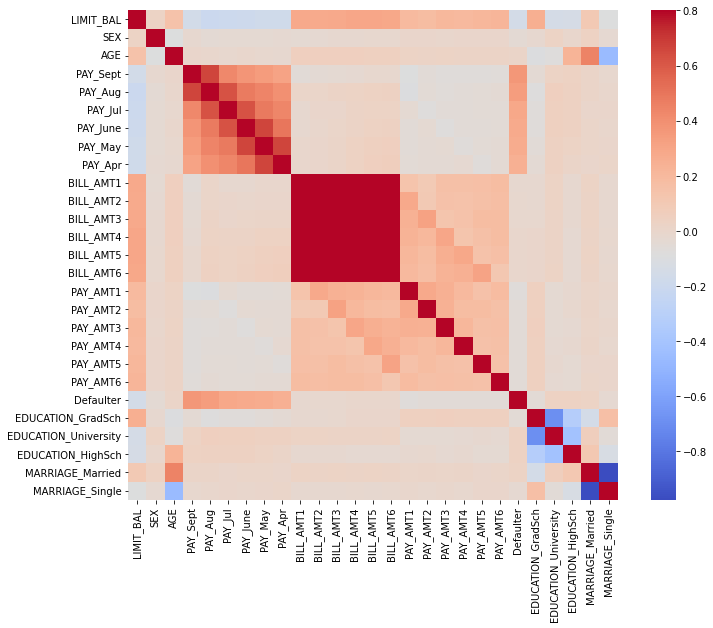

In [36]:
## Correlation of the variables - one way to do feature selection
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, cmap = "coolwarm")
plt.show()

In [37]:
## Chi2 Test for Feature Selection
selector = SelectKBest(chi2, k=13) ## we set k to 13 as we currently have 26 features and want to reduce it by half.
X_train_chi2 = selector.fit_transform(X, y)
chi2_selected = selector.get_support()
importance_df_chi = pd.DataFrame()
importance_df_chi['Feature'] = X.columns 
importance_df_chi['Important_chi'] = chi2_selected
importance_df_chi

,Feature,Important_chi
0,LIMIT_BAL,True
1,SEX,True
2,AGE,False
3,PAY_Sept,True
4,PAY_Aug,True
5,PAY_Jul,True
6,PAY_June,True
7,PAY_May,True
8,PAY_Apr,True
9,BILL_AMT1,False


In [217]:
## Wrapper Method Feature Selection - Forward Selection
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=13)
sfs.fit(X, y)
forward_selected = sfs.get_support()

In [ ]:
## Embedded Method using Random Forest Importance
rfc = RandomForestClassifier()
rfc.fit(X,y)
importance  = rfc.feature_importances_
importance_df = pd.DataFrame()
importance_df['Feature'] = X.columns
importance_df['RF Importance'] = importance

In [ ]:
## Combine to 1 df with all the importance
importance_df['Forward'] = forward_selected
importance_df['Important_chi'] = selector.get_support()
importance_df.sort_values('RF Importance', ascending = False, inplace=True)
importance_df

,Feature,RF Importance,Forward,Important_chi
2,AGE,0.069645,False,False
9,BILL_AMT1,0.068276,False,False
3,PAY_Sept,0.066498,True,True
0,LIMIT_BAL,0.062244,False,True
10,BILL_AMT2,0.058968,True,False
11,BILL_AMT3,0.057137,True,False
15,PAY_AMT1,0.054182,True,False
13,BILL_AMT5,0.053692,False,False
12,BILL_AMT4,0.053364,True,False
14,BILL_AMT6,0.053032,True,False


In [39]:
## Storing the features we have selected 

features_selected = [
'PAY_Sept',
'LIMIT_BAL',
'PAY_Aug',
'PAY_Jul',
'PAY_June',
'PAY_May',
'MARRIAGE_Married',
'MARRIAGE_Single',
'PAY_Apr',
'EDUCATION_University',
'EDUCATION_GradSch',
'BILL_AMT2',
'SEX'
]


X_features_selected = X[features_selected]

Based on the dataframe above, we will select the following features: 

- PAY_Sept
- PAY_Aug
- PAY_Jul
- PAY_June
- PAY_Apr
- PAY_Mar
- MARRIAGE_Married
- SEX
- LIMIT_BAL
- EDUCATION_University
- EDUCATION_GradSch
- EDUCATION_HighSch

We first look at the boolean values of Chi-Squared and the forward wrrapper feature selection, then we make use of RF Importance as a tie-breaker. As the RF Importance is sorted in descending order, the attributes at the top half of the dataframe (importance_df) will be comparatively more important that those at the bottom half. If the boolean values of the Chi-Squared and dorward wrapper feature selection are both true, then we will select the feature. If one of the boolean values are false, we then look at the RF Importance value. If the attribute is at the top half of the dataframe, then we select that attribute, if not we will not select it.

## Model Selection

In [40]:
## Do our train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features_selected, y, test_size=0.25, random_state=1234)

In [41]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

# Separate majority and minority classes
df_majority = df_train[df_train.Defaulter==0]
df_minority = df_train[df_train.Defaulter==1]

In [42]:

sm = SMOTE(random_state=1234, sampling_strategy= 1.0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

22500
35128
17564.0


### Logistic Regression

Naive Model

In [158]:
LR_imp = LogisticRegression(C=3.73, random_state=1234)
LR_imp.fit(X_train_naive, y_train_naive)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.73, random_state=1234)

In [159]:
y_pred = LR_imp.predict(X_test_naive)
print(classification_report(y_test_naive, y_pred))
print('Accuracy: ', accuracy_score(y_test_naive, y_pred))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test_naive, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5800
           1       0.00      0.00      0.00      1700

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.67      7500

Accuracy:  0.7732
Average Class Accuracy:  0.4999137931034483


Text(0.5, 1.0, 'Confusion Matrix - Naive Logistic Regression Model')

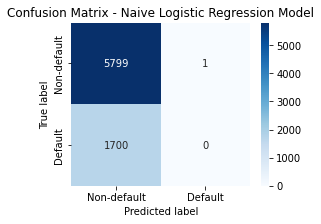

In [160]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_naive, y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive Logistic Regression Model")

Tuned Model

In [161]:
# hyperparameter tuning for Logistic Regression
params = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l1','elasticnet','l2'],
    "C" : [100, 10, 1.0, 0.1, 0.01]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = params, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(X_SMOTE, y_SMOTE)
print(grid_result.best_params_)

KeyboardInterrupt: 

In [162]:
optimised_lr = LogisticRegression(C = 10, penalty = "l1", solver = "liblinear", random_state = 1234)
optimised_lr.fit(X_SMOTE, y_SMOTE)

LogisticRegression(C=10, penalty='l1', random_state=1234, solver='liblinear')

In [163]:
y_pred_op_lr = optimised_lr.predict(X_test)
print(classification_report(y_test, y_pred_op_lr))
print('Accuracy: ', accuracy_score(y_test, y_pred_op_lr))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_op_lr))

# small increase from naive model

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      5800
         1.0       0.50      0.58      0.54      1700

    accuracy                           0.77      7500
   macro avg       0.69      0.71      0.69      7500
weighted avg       0.79      0.77      0.78      7500

Accuracy:  0.7730666666666667
Average Class Accuracy:  0.7060750507099391


Text(0.5, 1.0, 'Confusion Matrix - Tuned Logistic Regression Model')

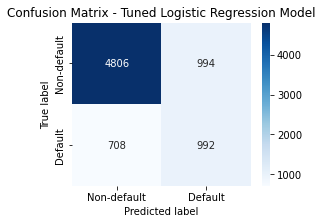

In [164]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_op_lr)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Tuned Logistic Regression Model")

### XGBoost

Naive Model

In [165]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_naive, y_train_naive)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [166]:
y_pred_xgb = model_xgb.predict(X_test_naive)
predictions = [round(value) for value in y_pred_xgb]
print(classification_report(y_test_naive, predictions))
print('Accuracy: ', accuracy_score(y_test_naive, predictions))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test_naive, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5800
           1       0.66      0.37      0.48      1700

    accuracy                           0.81      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.81      0.79      7500

Accuracy:  0.8144
Average Class Accuracy:  0.6575354969574037


Text(0.5, 1.0, 'Confusion Matrix - Naive XGBoost Classifier')

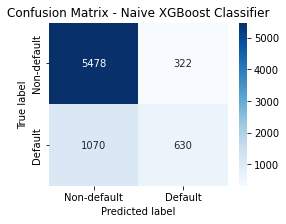

In [167]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive XGBoost Classifier")

Tuned Model

In [178]:
# hyperparameter tuning
param_test = {
        'min_child_weight': [1, 2, 4],
        'gamma': [0,1,2],
        "learning_rate"    : [0.1, 0.2, 0.3],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4, 6],
        'scale_pos_weight': [1,2]
        }
gsearch7 = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring= 'f1', n_jobs=2, cv=5)
gsearch7.fit(X_SMOTE, y_SMOTE)
print(gsearch7.best_params_)

{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'scale_pos_weight': 2}


In [179]:
optimised_xgb = XGBClassifier(colsample_bytree = 0.8, gamma = 2, learning_rate = 0.1, max_depth = 3, min_child_weight = 1, scale_pos_weight = 2 )
optimised_xgb.fit(X_SMOTE, y_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [175]:
# printing accuracy of optimised xgb
y_pred_op_xgb = optimised_xgb.predict(X_test)
print(classification_report(y_test, y_pred_op_xgb))
print('Accuracy: ', accuracy_score(y_test, y_pred_op_xgb))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_op_xgb))

# overall slight increase in accuracy as compared to naive model

              precision    recall  f1-score   support

         0.0       0.92      0.50      0.65      5800
         1.0       0.33      0.84      0.47      1700

    accuracy                           0.58      7500
   macro avg       0.62      0.67      0.56      7500
weighted avg       0.78      0.58      0.61      7500

Accuracy:  0.5765333333333333
Average Class Accuracy:  0.6706947261663285


Text(0.5, 1.0, 'Confusion Matrix - Tuned XGBoost Classifier')

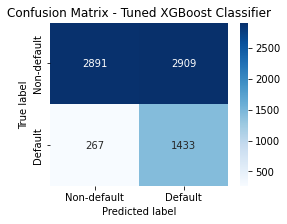

In [176]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_op_xgb)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Tuned XGBoost Classifier")

### Neural Network

Naive Model

In [ ]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            len(X_train_naive.columns)/2, activation="relu", input_shape=(X_train_naive.shape[-1],)
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(len(X_train_naive.columns) / 4, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dropout (Dropout)           (None, 23)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                264       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 828
Trainable params: 828
Non-trainable params: 0
_________________________________________________________________


In [ ]:
metrics = [
    keras.metrics.Accuracy(name="Accuracy")
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

model.fit(
    X_train_naive,
    y_train_naive,
    batch_size=2048,
    epochs=100,
    validation_data=(X_test_naive, y_test_naive)
)

Epoch 1/100
113/113 [==============================] - 3s 12ms/step - loss: 693.8287 - fn: 4527.0000 - fp: 1549.0000 - tn: 16015.0000 - tp: 409.0000 - precision: 0.2089 - recall: 0.0829 - Accuracy: 0.1654 - val_loss: 0.6241 - val_fn: 1700.0000 - val_fp: 0.0000e+00 - val_tn: 5800.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_Accuracy: 1.3333e-04
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 4.7485 - fn: 4848.0000 - fp: 340.0000 - tn: 17224.0000 - tp: 88.0000 - precision: 0.2056 - recall: 0.0178 - Accuracy: 0.0183 - val_loss: 0.5369 - val_fn: 1700.0000 - val_fp: 0.0000e+00 - val_tn: 5800.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_Accuracy: 1.3333e-04
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 3.0465 - fn: 4869.0000 - fp: 279.0000 - tn: 17285.0000 - tp: 67.0000 - precision: 0.1936 - recall: 0.0136 - Accuracy: 0.0147 - val_loss: 0.5383 - val_fn: 1699

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

In [ ]:
predictions = model.predict(X_test_naive)
predictions = np.argmax(predictions,axis=1)
print(classification_report(y_test_naive, predictions))
print('Accuracy: ', accuracy_score(y_test_naive, predictions))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test_naive, predictions))

235/235 [==============================] - 0s 761us/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5800
           1       0.00      0.00      0.00      1700

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.67      7500

Accuracy:  0.7733333333333333
Average Class Accuracy:  0.5


c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Confusion matrix for naive Neural Network model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_naive, predictions)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive Neural Network Model")

Text(0.5, 1.0, 'Confusion Matrix - Naive Neural Network Model')

#### Tuned Model

In [212]:
from tensorflow import keras


model = keras.Sequential(
    [
        keras.layers.Dense(
            8, activation="relu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 112       
                                                                 
 dropout_26 (Dropout)        (None, 8)                 0         
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
 dropout_27 (Dropout)        (None, 4)                 0         
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [213]:
metrics = [

    keras.metrics.Accuracy(name="Accuracy")
]

model.compile(
    optimizer=keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=metrics
)



model.fit(
    X_SMOTE, 
    y_SMOTE,
    batch_size=2048,
    epochs=100,
    verbose=2,
    validation_split = 0.2,
    validation_data=(X_test, y_test),
    
)

Epoch 1/100
18/18 - 1s - loss: 0.7448 - Accuracy: 0.0000e+00 - val_loss: 0.7677 - val_Accuracy: 0.0000e+00 - 786ms/epoch - 44ms/step
Epoch 2/100
18/18 - 0s - loss: 0.7200 - Accuracy: 0.0000e+00 - val_loss: 0.7326 - val_Accuracy: 0.0000e+00 - 81ms/epoch - 5ms/step
Epoch 3/100
18/18 - 0s - loss: 0.7047 - Accuracy: 0.0000e+00 - val_loss: 0.7075 - val_Accuracy: 0.0000e+00 - 75ms/epoch - 4ms/step
Epoch 4/100
18/18 - 0s - loss: 0.6951 - Accuracy: 0.0000e+00 - val_loss: 0.6922 - val_Accuracy: 0.0000e+00 - 75ms/epoch - 4ms/step
Epoch 5/100
18/18 - 0s - loss: 0.6881 - Accuracy: 0.0000e+00 - val_loss: 0.6810 - val_Accuracy: 0.0000e+00 - 78ms/epoch - 4ms/step
Epoch 6/100
18/18 - 0s - loss: 0.6832 - Accuracy: 0.0000e+00 - val_loss: 0.6738 - val_Accuracy: 0.0000e+00 - 73ms/epoch - 4ms/step
Epoch 7/100
18/18 - 0s - loss: 0.6791 - Accuracy: 0.0000e+00 - val_loss: 0.6686 - val_Accuracy: 0.0000e+00 - 73ms/epoch - 4ms/step
Epoch 8/100
18/18 - 0s - loss: 0.6780 - Accuracy: 0.0000e+00 - val_loss: 0.6634 -

<AxesSubplot: >

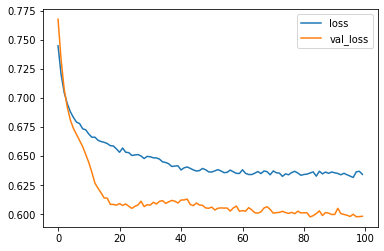

In [214]:

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()


In [215]:
predictions = model.predict(X_test)
predictions = np.rint(predictions).astype(int)
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, predictions))

235/235 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      5800
         1.0       0.48      0.62      0.54      1700

    accuracy                           0.76      7500
   macro avg       0.68      0.71      0.69      7500
weighted avg       0.79      0.76      0.77      7500

Accuracy:  0.7604
Average Class Accuracy:  0.711815415821501


Text(0.5, 1.0, 'Confusion Matrix - Tuned Neural Network Model')

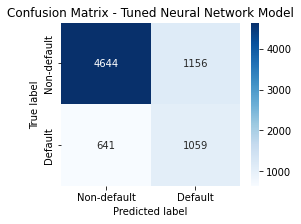

In [216]:
## Confusion matrix for tuned Neural Network model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, predictions)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Tuned Neural Network Model")

### Support Vector Machine

Naive Model

In [ ]:
## Building the naive SVM model
svm = SVC(random_state=1234)
svm.fit(X_train_naive, y_train_naive)

SVC(random_state=1234)

In [ ]:
## Model evaluation for the naive SVM model
y_pred_svm = svm.predict(X_test_naive)
print(classification_report(y_test_naive, y_pred_svm))
print('Accuracy: ', accuracy_score(y_test_naive, y_pred_svm))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test_naive, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5800
           1       0.00      0.00      0.00      1700

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.67      7500

Accuracy:  0.7733333333333333
Average Class Accuracy:  0.5


c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kaitl\anaconda3\envs\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Confusion matrix for naive SVM model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_naive, y_pred_svm)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive SVM Model")

Text(0.5, 1.0, 'Confusion Matrix - Naive SVM Model')

Tuned Model

In [ ]:
## Doing Hyperparameter Tuning here using GridSearchCV
param_grid={
    'C':[0.5, 1, 10, 100], # Regularization Parameter
    'gamma':['scale', 0.1, 0.001, 0.0001, 1],
    'kernel':['rbf']
}

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=False)

In [ ]:
optimal_params.fit(X_SMOTE ,y_SMOTE)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
optimised_svm = SVC(random_state = 1234, C = 100, gamma = 1, kernel = 'rbf', probability = True)
optimised_svm.fit(X_SMOTE, y_SMOTE)

In [ ]:
## Model evaluation for the tuned SVM model
y_pred_optimised_svm = optimised_svm.predict(X_test)
print(classification_report(y_test, y_pred_optimised_svm))
print('Accuracy: ', accuracy_score(y_test, y_pred_optimised_svm))
print('Average Class Accuracy: ', balanced_accuracy_score(y_test, y_pred_optimised_svm))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      5800
         1.0       0.47      0.56      0.51      1700

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.67      7500
weighted avg       0.77      0.76      0.76      7500



Text(0.5, 1.0, 'Confusion Matrix - Tuned SVM Model')

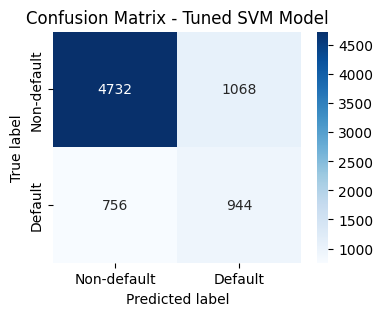

In [ ]:
## Confusion matrix for tuned SVM model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred_optimised_svm)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Tuned SVM Model")

In [ ]:
from sklearn import metrics

y_pred_proba_LR = optimised_lr.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_xgb = optimised_xgb.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

y_pred_proba_svm = optimised_svm.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_svm)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_svm)

y_pred_proba_nn = model.predict(X_test).ravel()
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_proba_nn)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_nn)

plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="XGBoost Classifier, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="SVM, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Neural Network, auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()

NameError: name 'optimised_lr' is not defined